In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("Rajasthan_Royals.csv")
#Predicted_11=pd.DataFrame(columns=['Name','Country','Role'])
df.index=df.index + 1#change of indexing
df['Name']=df['Name'].map(lambda x: str(x)[:-12])#characters removal
df['Average'][df['Average'] == '-'] = None
df['Average'] = df['Average'].astype(float)
df['Strike Rate'][df['Strike Rate'] == '-'] = None
df['Strike Rate'] = df['Strike Rate'].astype(float)
df['Wickets'][df['Wickets'] == '-'] = None
df['Wickets'] = df['Wickets'].astype(float)
df['Economy'][df['Economy'] == '-'] = None
df['Economy'] = df['Economy'].astype(float)
df['Runs'][df['Runs'] == '-'] = 0
df['Runs'] = df['Runs'].astype(int)
df['Bowling Average'][df['Bowling Average'] == '-'] = None
df['Bowling Average'] = df['Bowling Average'].astype(float)
df['Bowling Strike Rate'][df['Bowling Strike Rate'] == '-'] = None
df['Bowling Strike Rate'] = df['Bowling Strike Rate'].astype(float)
df.insert(loc=7 , column="Batting Rate",value=df['Average'] + df['Strike Rate'])
df.loc[df.Role == "Bowler", "Batting Rate"] = None
df.loc[df.Role == "Spin bowler", "Batting Rate"] = None
df.insert(loc=12 , column="Bowling Rate",value=(df['Bowling Average'] + df['Bowling Strike Rate'] +df['Economy']).rdiv(1000).round(2))
df.loc[df.Role == "Batsman", "Bowling Rate"] = None
df.loc[df.Role == "Opening batsman", "Bowling Rate"] = None
df.loc[df.Role == "Wicketkeeper batsman", "Bowling Rate"] = None
df.loc[df.Role == "Opening Wicketkeeper batsman", "Bowling Rate"] = None
df.insert(loc=13 , column="Allrounder's Rate",value=df['Runs']+df['Wickets']+df['Strike Rate'] + df['Economy'].rdiv(100))
df.loc[df.Role == "Batsman", "Allrounder's Rate"] = None
df.loc[df.Role == "Opening batsman", "Allrounder's Rate"] = None
df.loc[df.Role == "Wicketkeeper batsman", "Allrounder's Rate"] = None
df.loc[df.Role == "Opening Wicketkeeper batsman", "Allrounder's Rate"] = None
df.loc[df.Role == "Bowler", "Allrounder's Rate"] = None
df.loc[df.Role == "Spin bowler", "Allrounder's Rate"] = None
df["Allrounder's Rate"]=df["Allrounder's Rate"].round(2)
df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,Name,Country,Role,Matches,Runs,Average,Strike Rate,Batting Rate,Wickets,Bowling Average,Bowling Strike Rate,Economy,Bowling Rate,Allrounder's Rate
1,Robin Uthappa,India,Opening batsman,256,6504,28.90,133.16,162.06,0.0,NaN,NaN,11.00,NaN,NaN
2,Manan Vohra,India,Opening batsman,96,2344,27.57,128.29,155.86,NaN,NaN,NaN,NaN,NaN,NaN
3,Yashasvi Jaiswal,India,Opening batsman,13,779,70.81,91.53,162.34,5.0,17.60,23.6,4.47,NaN,NaN
4,Steven Smith(c),Australia,Batsman,189,4014,31.60,126.14,157.74,54.0,19.55,15.2,7.68,NaN,NaN
5,David Miller,South Africa,Batsman,319,6900,34.50,138.02,172.52,0.0,NaN,NaN,10.33,NaN,NaN
6,Mahipal Lomror,India,Batsman,39,810,26.12,117.90,144.02,6.0,64.16,52.3,7.35,NaN,NaN
7,Aniruddha Joshi,India,Batsman,16,260,32.50,146.89,179.39,6.0,12.33,10.0,7.40,NaN,NaN
8,Jos Buttler,England,Wicketkeeper batsman,252,5782,30.43,144.73,175.16,NaN,NaN,NaN,NaN,NaN,NaN
9,Sanju Samson,India,Batsman,149,3481,26.98,126.62,153.60,1.0,4.00,3.0,8.00,NaN,NaN
10,Anuj Rawat,India,Wicketkeeper batsman,15,235,26.11,112.98,139.09,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
captain_df=df.query("Name.str.endswith('(c)')")#captain


obt_df=df.query("Role == 'Opening batsman' or Role == 'Opening Wicketkeeper batsman'")#obt
obt_df.sort_values(by=(['Runs']+['Batting Rate']), inplace=True, ascending=False)
top_obt_df=obt_df.head(2)
top_obt_df.sort_values(by=["Runs"], inplace=True, ascending=False)

owk_df=obt_df.query("Role == 'Opening Wicketkeeper batsman'")#owk
obt_df=obt_df.drop(df[df.Role== 'Opening Wicketkeeper batsman'].index)

bat_df=df.query("Role == 'Batsman'")#Batsman
bat_df.sort_values(by=(['Runs']+['Batting Rate']), inplace=True, ascending=False)
top_bat_df=bat_df.head(3)
top_bat_df.sort_values(by=["Runs"], inplace=True, ascending=False)

wkb_df=df.query("Role == 'Wicketkeeper batsman'")#WKB
wkb_df.sort_values(by=['Batting Rate'], inplace=True, ascending=False)

fbw_df=df.query("Role == 'Bowler'")#Fast bowlers
fbw_df.sort_values(by=(['Wickets']+['Bowling Rate']), inplace=True, ascending=False)
top_fbw_df=fbw_df.head(3)
top_fbw_df.sort_values(by=["Wickets"], inplace=True, ascending=False)

sbw_df=df.query("Role == 'Spin bowler'")#Spin Bowlers
sbw_df.sort_values(by=(['Wickets']+['Bowling Rate']), inplace=True, ascending=False)
top_sbw_df=sbw_df.head(3)
top_sbw_df.sort_values(by=["Wickets"], inplace=True, ascending=False)

all_df=df.query("Role == 'Allrounder' or Role == 'All round spin bowler'")#All rounders
all_df.sort_values(by=["Allrounder's Rate"], inplace=True, ascending=False)
final_all_df=all_df.head(3)     
final_all_df.sort_values(by=["Runs"], inplace=True, ascending=False)


def initial_team(captain_df,owk_df,top_obt_df,top_bat_df,wkb_df,top_fbw_df,top_sbw_df,final_all_df):
    
    count_asp=0
    count_all=0

    for a in final_all_df.index:
        if(final_all_df["Role"][a] =="Allrounder"):
            count_all=count_all+1
        else:
            count_asp=count_asp+1               
            
 #combinations
    if owk_df.empty is False:
        if(captain_df.Role.any() == "Batsman"):
            top_bat_df=top_bat_df.drop(df[df.Name.str.endswith('(c)')].index)
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([owk_df.head(1),top_obt_df.head(1),captain_df,top_bat_df.head(2),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([owk_df.head(1),top_obt_df.head(1),captain_df,top_bat_df.head(2),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([owk_df.head(1),top_obt_df.head(1),captain_df,top_bat_df.head(2),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")    
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([owk_df.head(1),top_obt_df.head(1),captain_df,top_bat_df.head(2),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        elif(captain_df.Role.any() == "Opening Wicketkeeper batsman"):
            owk_df=owk_df.drop(df[df.Name.str.endswith('(c)')].index)
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")    
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        elif(captain_df.Role.any() == "Opening batsman"):
            top_obt_df=top_obt_df.drop(df[df.Name.str.endswith('(c)')].index)
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([owk_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")    
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([owk_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([owk_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([owk_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        elif(captain_df.Role.any() == "Wicketkeeper batsman"):
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")    
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        else:
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")    
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
    else:
        if(captain_df.Role.any() == "Batsman"):
            top_bat_df=top_bat_df.drop(df[df.Name.str.endswith('(c)')].index)
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(2),captain_df,top_bat_df.head(1),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(2),captain_df,top_bat_df.head(1),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(2),captain_df,top_bat_df.head(1),wkb_df.head(1),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(2),captain_df,top_bat_df.head(1),wkb_df.head(1),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        #elif (captain_df.Role.any() == "Opening Wicketkeeper batsman"):
            #Predicted_11=pd.concat([top_obt_df.head(2),captain_df,top_bat_df.head(3)]).drop_duplicates(keep="first")    
        elif (captain_df.Role.any() == "Opening batsman"):
            top_obt_df=top_obt_df.drop(df[df.Name.str.endswith('(c)')].index)
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(2),wkb_df.head(1),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        elif (captain_df.Role.any() == "Wicketkeeper batsman"):
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        else:
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")    
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
    return Predicted_11

Initial_11=initial_team(captain_df,owk_df,top_obt_df,top_bat_df,wkb_df,top_fbw_df,top_sbw_df,final_all_df)
Initial_11
#Benched Players
Reserved_Players=pd.merge(df,Initial_11, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
Reserved_Overseas_Players = Reserved_Players.query("Country != 'India'")
Reserved_Indian_Fast_Bowlers=Reserved_Players.query("Role == 'Bowler' and Country == 'India'")
Reserved_Indian_Fast_Bowlers.sort_values(by=(['Wickets']+['Bowling Rate']), inplace=True, ascending=False)
#Reserved_Indian_Fast_Bowlers
Reserved_Indian_Spin_Bowlers=Reserved_Players.query("Role == 'Spin bowler' and Country == 'India'")
Reserved_Indian_Spin_Bowlers.sort_values(by=(['Wickets']+['Bowling Rate']), inplace=True, ascending=False)
#Reserved_Indian_Spin_Bowlers
Reserved_Indian_ALL_or_ASP=Reserved_Players.query("(Role == 'Allrounder' or Role == 'All round spin bowler') and Country == 'India'")
Reserved_Indian_ALL_or_ASP.sort_values(by=(["Matches"]), inplace=True, ascending=False)
#Reserved_Indian_ALL_or_ASP
Reserved_Indian_Batsman=Reserved_Players.query("Role == 'Batsman' and Country == 'India'")
Reserved_Indian_Batsman.sort_values(by=(['Runs']+['Batting Rate']), inplace=True, ascending=False)
#Reserved_Indian_Batsman
Reserved_Indian_Openers=Reserved_Players.query("Role == 'Opening batsman' and Country == 'India'")
Reserved_Indian_Openers.sort_values(by=(['Runs']+['Batting Rate']), inplace=True, ascending=False)
Reserved_Indian_Openers
Reserved_Indian_Keepers=Reserved_Players.query("(Role == 'Wicketkeeper batsman' or Role == 'Opening Wicketkeeper batsman') and Country == 'India'")
Reserved_Indian_Keepers.sort_values(by=(['Runs']+['Batting Rate']), inplace=True, ascending=False)
#Reserved_Indian_Keepers
#Reserved_Indian_Players
Overseas_Count=0

for a in Initial_11.index:#counts the number of overseas players
    if(Initial_11['Country'][a]!="India"):
        Overseas_Count=Overseas_Count+1

if(Overseas_Count > 4):#removes the extra overseas players
    for a in Initial_11.index:
        if(Initial_11['Country'][a]!="India"):
            Current_Overseas_Players=Initial_11.query("Country != 'India'")
    Current_Overseas_Players.sort_values(by=['Matches'], inplace=True, ascending=False)
    Reserved_Overseas_Players=Reserved_Overseas_Players.append(Current_Overseas_Players.tail(Overseas_Count-4))
    
    for a in Current_Overseas_Players.tail(Overseas_Count-4).index:#replaces overseas players with indian players
        if(Current_Overseas_Players.tail(Overseas_Count-4)['Role'][a] == "All round spin bowler"):# Current_Overseas_Players.tail(Overseas_Count-4)['Role'][a] == "All round spin bowler"):
            final_all_df.drop(index=a, inplace = True)
            final_all_df=final_all_df.append(Reserved_Indian_ALL_or_ASP.head(1))
            Reserved_Indian_ALL_or_ASP=Reserved_Indian_ALL_or_ASP[1:]
        elif(Current_Overseas_Players.tail(Overseas_Count-4)['Name'][a] == "Ben Stokes"):
            if(Reserved_Indian_ALL_or_ASP.empty is True):
                new_selected_df=Current_Overseas_Players.query("Name == 'Andrew Tye'")
                top_fbw_df=top_fbw_df.drop(new_selected_df[new_selected_df.Name == 'Andrew Tye'].index)
                top_fbw_df=top_fbw_df.drop(top_fbw_df[top_fbw_df.Name == 'Jofra Archer'].index)
                top_fbw_df=top_fbw_df.append(Reserved_Indian_Fast_Bowlers.head(2))
                Reserved_Indian_Fast_Bowlers=Reserved_Indian_Fast_Bowlers[2:]
            else:    
                final_all_df.drop(index=a, inplace = True)
                final_all_df=final_all_df.append(Reserved_Indian_ALL_or_ASP.head(1))
                Reserved_Indian_ALL_or_ASP=Reserved_Indian_ALL_or_ASP[1:]    
        elif(Current_Overseas_Players.tail(Overseas_Count-4)['Name'][a] == "Tom Curran"):
            if(Reserved_Indian_ALL_or_ASP.empty is True):
                new_selected_df=Current_Overseas_Players.query("Name == 'David Miller'")
                top_bat_df=top_bat_df.drop(new_selected_df[new_selected_df.Name == 'David Miller'].index)
                top_bat_df=top_bat_df.append(Reserved_Indian_Batsman.head(1))
                Reserved_Indian_Batsman=Reserved_Indian_Batsman[1:]  
            else:    
                final_all_df.drop(index=a, inplace = True)
                final_all_df=final_all_df.append(Reserved_Indian_ALL_or_ASP.head(1))
                Reserved_Indian_ALL_or_ASP=Reserved_Indian_ALL_or_ASP[1:]
        elif(Current_Overseas_Players.tail(Overseas_Count-4)['Role'][a] == "Opening Wicketkeeper batsman"):
            owk_df.drop(index=a, inplace = True)
            owk_df=owk_df.append(Reserved_Indian_Keepers.head(1))
            Reserved_Indian_Keepers=Reserved_Indian_Keepers[1:]
        elif(Current_Overseas_Players.tail(Overseas_Count-4)['Role'][a] == "Opening batsman"):
            top_obt_df.drop(index=a, inplace = True)
            top_obt_df=obt_df.append(Reserved_Indian_Openers.head(1))
            Reserved_Indian_Openers=Reserved_Indian_Openers[1:] 
        elif(Current_Overseas_Players.tail(Overseas_Count-4)['Role'][a] == "Batsman"):
            if(Reserved_Indian_Batsman.empty is True):
                new_selected_df=Current_Overseas_Players.query("Role == 'Opening batsman'")
                top_obt_df=top_obt_df.drop(new_selected_df[new_selected_df.Role== 'Opening batsman'].index)
                top_obt_df=top_obt_df.append(Reserved_Indian_Openers.head(1))
                #Reserved_Indian_Openers=Reserved_Indian_Openers[1:] 
            else:
                top_bat_df.drop(index=a, inplace = True)
                top_bat_df=top_bat_df.append(Reserved_Indian_Batsman.head(1))
                Reserved_Indian_Batsman=Reserved_Indian_Batsman[1:]
        elif(Current_Overseas_Players.tail(Overseas_Count-4)['Role'][a] == "Bowler"):
            top_fbw_df.drop(index=a, inplace = True)
            top_fbw_df=top_fbw_df.append(Reserved_Indian_Fast_Bowlers.head(1))
            Reserved_Indian_Fast_Bowlers=Reserved_Indian_Fast_Bowlers[1:]
        elif(Current_Overseas_Players.tail(Overseas_Count-4)['Role'][a] == "Spin bowler"):
            top_sbw_df.drop(index=a, inplace = True)
            top_sbw_df=top_sbw_df.append(Reserved_Indian_Spin_Bowlers.head(1))
            Reserved_Indian_Spin_Bowlers=Reserved_Indian_Spin_Bowlers[1:]      
    Current_Overseas_Players=pd.merge(Current_Overseas_Players,Current_Overseas_Players.tail(Overseas_Count-4), indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
    Final_11=initial_team(captain_df,owk_df,top_obt_df,top_bat_df,wkb_df,top_fbw_df,top_sbw_df,final_all_df).iloc[:,[0,1,2]]
else:
     Final_11=Predicted_11.iloc[:,[0,1,2]]

#Reserved_Indian_Batsman
Final_11=Final_11.reset_index(drop=True)
Final_11.index=Final_11.index+1
Final_11
#top_fbw_df
#final_all_df
#Reserved_Indian_ALL_or_ASP
#top_bat_df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home

,Name,Country,Role
1,Robin Uthappa,India,Opening batsman
2,Manan Vohra,India,Opening batsman
3,Steven Smith(c),Australia,Batsman
4,Sanju Samson,India,Batsman
5,Jos Buttler,England,Wicketkeeper batsman
6,Ben Stokes,England,Allrounder
7,Tom Curran,England,Allrounder
8,Rahul Tewatia,India,All round spin bowler
9,Shreyas Gopal,India,Spin bowler
10,Jaydev Unadkat,India,Bowler


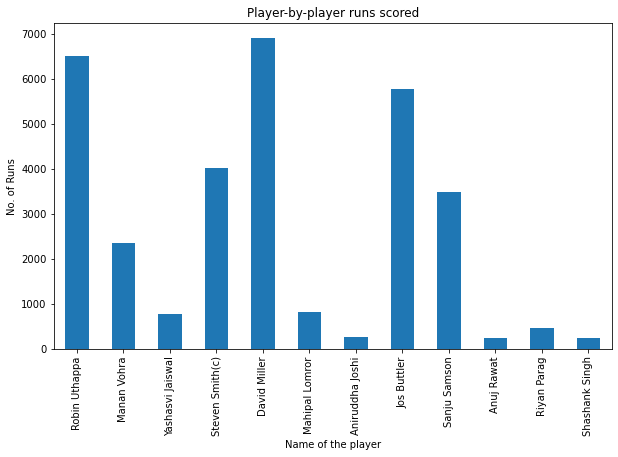

In [3]:
#histograms
BR_df=df.query("Role == 'Opening batsman' or Role == 'Opening Wicketkeeper batsman' or Role == 'Batsman' or Role == 'Wicketkeeper batsman'")
BR_df.set_index("Name", inplace = True) 
BR_df=BR_df.T
players= BR_df.columns.tolist()
df_runs = BR_df.loc['Runs', players]

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

df_runs.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Name of the player') # add to x-label to the plot
plt.ylabel('No. of Runs') # add y-label to the plot
plt.title('Player-by-player runs scored') # add title to the plot

plt.show()

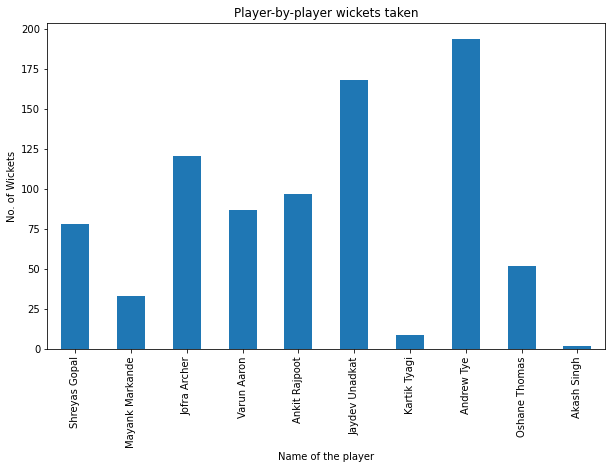

In [4]:
#histograms
BR_df=df.query("Role == 'Bowler' or Role == 'Spin bowler'")
BR_df.set_index("Name", inplace = True) 
BR_df=BR_df.T
players= BR_df.columns.tolist()
df_wickets = BR_df.loc['Wickets', players]

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

df_wickets.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Name of the player') # add to x-label to the plot
plt.ylabel('No. of Wickets') # add y-label to the plot
plt.title('Player-by-player wickets taken') # add title to the plot

plt.show()

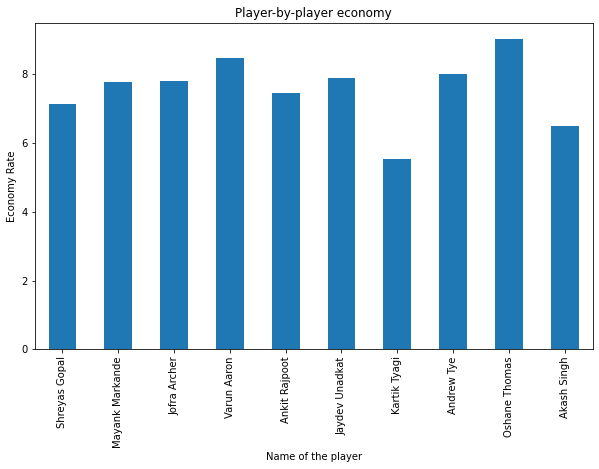

In [5]:
#histograms
BR_df=df.query("Role == 'Bowler' or Role == 'Spin bowler'")
BR_df.set_index("Name", inplace = True) 
BR_df=BR_df.T
players= BR_df.columns.tolist()
df_economy = BR_df.loc['Economy', players]
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

df_economy.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Name of the player') # add to x-label to the plot
plt.ylabel('Economy Rate') # add y-label to the plot
plt.title('Player-by-player economy') # add title to the plot

plt.show()

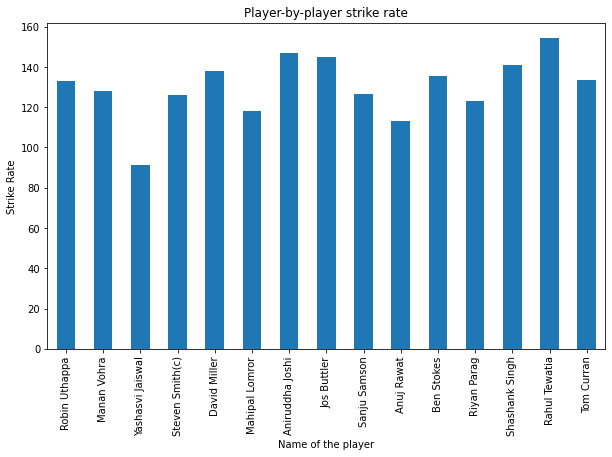

In [6]:
BR_df=df.query("Role == 'All round spin bowler' or Role == 'Allrounder' or Role == 'Opening batsman' or Role == 'Opening Wicketkeeper batsman' or Role == 'Batsman' or Role == 'Wicketkeeper batsman'")
BR_df.set_index("Name", inplace = True) 
BR_df=BR_df.T
players= BR_df.columns.tolist()
df_SR = BR_df.loc['Strike Rate', players]

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

df_SR.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Name of the player') # add to x-label to the plot
plt.ylabel('Strike Rate') # add y-label to the plot
plt.title('Player-by-player strike rate') # add title to the plot

plt.show()